## Ejercicio Time Series Forecast
Para este ejercicio vamos a predecir cuál será la demanda de pasajeros de una aerolinea, para poder anticiparse a las contrataciones de personal, mantenimiento de las aeronaves y gestión de inventario y comidas.

Para ello, se pide:
1. Carga datos (AirPassengers.csv) y representa la serie. ¿Hay seasonality? ¿Cada cuanto?
2. Crea en una gráfica la variable original + su media obtenida mediante una rolling window con el valor de seasonality obtenido en el apartado anterior. Tienes que usar la función rolling() del DataFrame.
3. Comprueba de manera estadística si la serie es o no stationary.
4. Aplica una transformación logarítmica sobre los datos para mejorar el proceso de transformación de tu time series a stationary. Acuérdate después del forecast de invertir la transformación.
5. Divide en train y test. Guarda 20 muestras para test.
6. Crea tu primer modelo ARIMA. Habrá varias combinaciones en función de sus hiperparámetros... Mide el MAE y RMSE del modelo en predicción. Ten en cuenta el parámetro "m" de la función ARIMA, mediante el cual se establece el seasonality.
7. Representa en una gráfica los datos de test y tus predicciones.
8. Prueba un decission tree y un random forest, a ver qué performance presentan.

## 1. Carga datos y representa la serie

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("data\\AirPassengers.csv", index_col=0)

In [3]:
data

,value
date,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


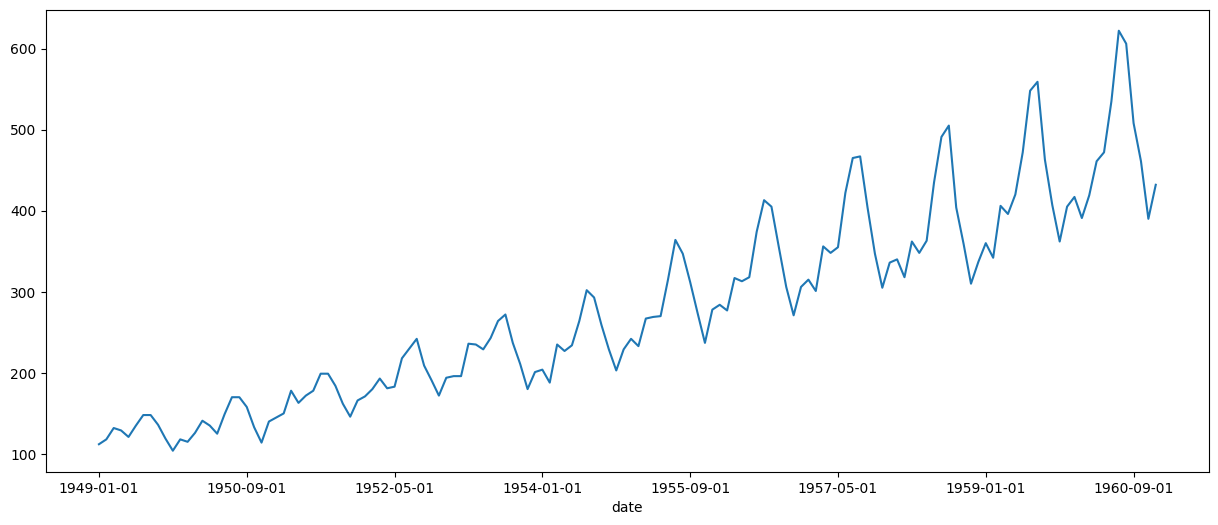

In [4]:
data["value"].plot(figsize=(15,6));

In [5]:
from statsmodels.graphics.tsaplots import plot_acf

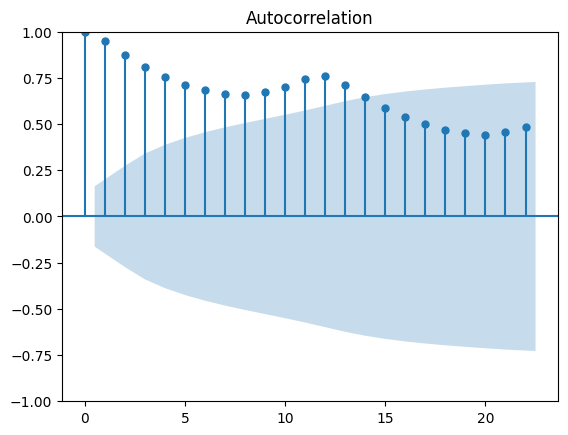

In [6]:
plot_acf(data["value"]);

#### Hay seasonality cada 12 valores

## 2. Crea en una gráfica la variable original + su media obtenida mediante una rolling window comparando el valor de seasonality obtenido en el apartado anterior

In [7]:
import matplotlib.pyplot as plt

In [8]:
data["rolling"] = data["value"].rolling(window=12).mean()

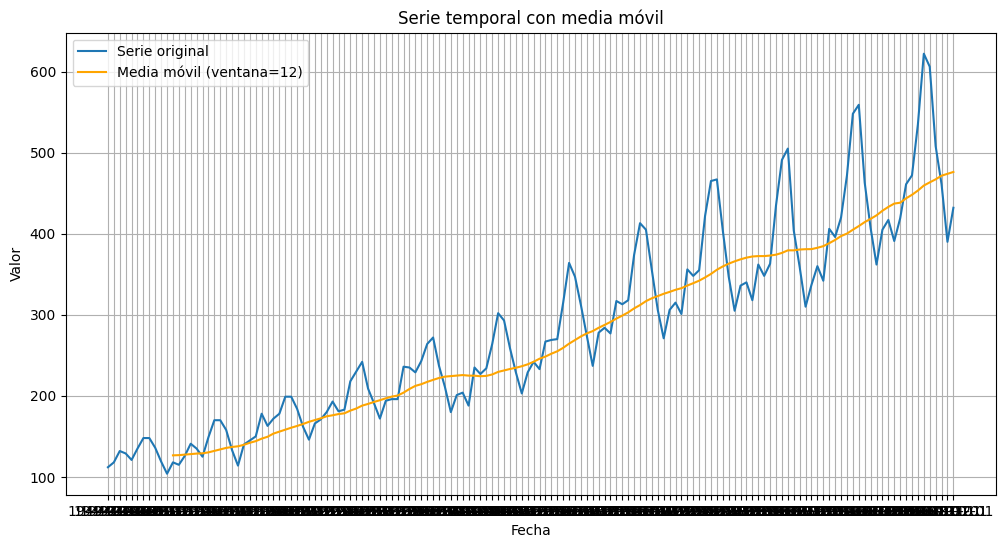

In [9]:
plt.figure(figsize=(12,6))
plt.plot(data["value"], label='Serie original')
plt.plot(data["rolling"], label='Media móvil (ventana=12)', color='orange')
plt.title('Serie temporal con media móvil')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.show()

## 3. Comprueba de manera estadística si la serie es o no stationary.

In [10]:
from statsmodels.tsa.stattools import adfuller

In [11]:
resultado_adf = adfuller(data["value"].dropna())  # eliminar NaNs si los hay

print('p-valor:', resultado_adf[1])

p-valor: 0.991880243437641


#### El p-valor es mucho mayor a 0.05, por lo que la serie no es estacionaria (no se puede rechazar la hipótesis nula)

## 4. Aplica una transformación logarítmica

In [12]:
import numpy as np

In [13]:
data["log_value"] = np.log(data["value"])

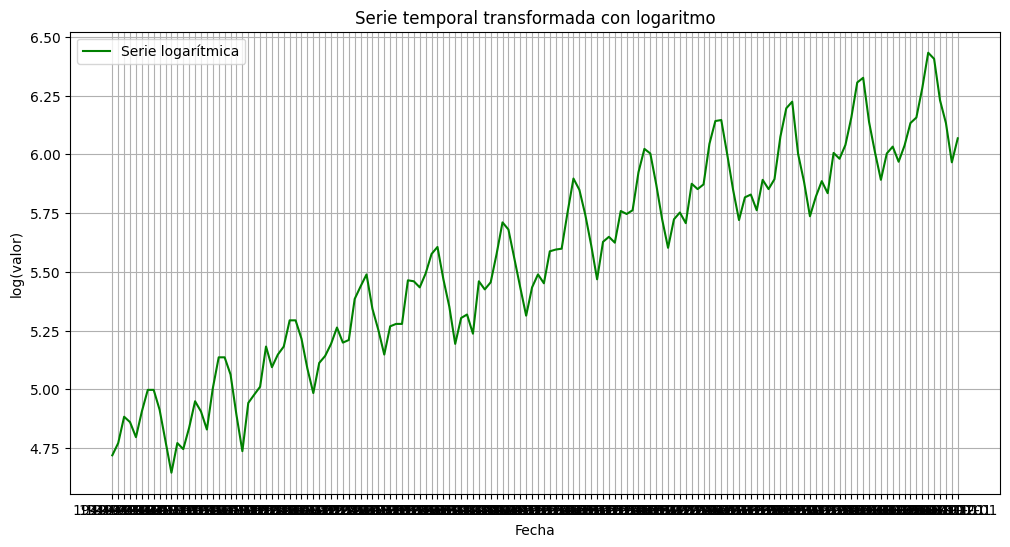

In [14]:
plt.figure(figsize=(12,6))
plt.plot(data["log_value"], label='Serie logarítmica', color='green')
plt.title('Serie temporal transformada con logaritmo')
plt.xlabel('Fecha')
plt.ylabel('log(valor)')
plt.grid(True)
plt.legend()
plt.show()

In [15]:
resultado_log_adf = adfuller(data["log_value"].dropna())

print("p-valor:", resultado_log_adf[1])

p-valor: 0.42236677477039125


## 5. Divide en train y test. Guarda 20 muestras para test.

In [16]:
X = data["log_value"].values
len(X)

144

In [17]:
train = X[:124]
test = X[124:]

In [18]:
len(train)

124

## 6. Crea tu primer modelo ARIMA

In [22]:
import pmdarima as pm

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

## 7. Representa en una gráfica los datos de test y tus predicciones.

## 8. Prueba otros modelos, a ver qué performance presentan.